# TRABAJO FINAL INTEGRADOR

### NOMBRE: GUIDO PETTINARI

### TUTOR: VALERIA SOLIANI

### UNIVERSIDAD: INSTITUTO TECNOLOGICO DE BUENOS AIRES (ITBA)

**El Trabajo se dividirá en:

  -  1) Análisis Exploratorio Descriptivo
  -  2) Feature Engineering o Preparación de Datos
  -  3) Modelos Predictivos: Probaremos diferentes algoritmos predictivos

## Carga de librerias y  csv

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from scipy import stats

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data = pd.read_csv("TFI - Dataset.csv", sep = ';')

# 1) Análisis Descriptivo

### a) Muestra de las primeras 5 filas para entender cuales son las columnas que contiene el csv

In [2]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### b) Con describe chequeamos la cantidad de elementos en cada columna cuantos unicos, la media y los quartiles. 

In [3]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,10085,10084,10091,10088,10092,10095,10092,10094,10090,10092,10086,10090,10086,10090,10090,10093,10088,10090,10095,10088,10089,10091,10090,10090,10088,10089,10092,10091,10092,10089,10085,10089,10086,10091,10090
unique,44,3,4,887,4,30,6,7,2,1471,5,3,72,5,6,10,5,4,1350,1428,11,2,3,16,3,5,2,5,41,8,5,38,20,17,19
top,35,No,Travel_Rarely,715,Research & Development,2,3,Life Sciences,1,1475,4,Male,96,3,1,Sales Executive,4,Married,2342,9096,1,Y,No,13,3,3,80,0,10,2,3,5,2,0,2
freq,539,8489,7196,40,6636,1484,3919,4189,10083,18,3068,6004,208,6045,3795,2188,3129,4594,32,23,3567,10084,7243,1431,8504,3101,10086,4376,1367,3723,6166,1380,2559,4008,2358


#### Primera conclusión: 

La fila count encontraremos diferentes cada columna tiene diferente cantidad de filas por lo que filtramos el dataset para que no contenga null values y luego buscamos con data.isnull si quedó alguna columna null

In [4]:
data = data.dropna()
display(data.isnull().any())


Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

#### Segunda conclusión: 
No nos está trayendo la media, mediana, los maximos y minimos valores. Esto quiere decir que los campos numéricos no los está tomando como tales por lo que deberemos realizar un cambio en los tipos de datos.

*Para validar esto haremos un data.info() para que nos diga el tipo de datos de cada columna.*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9877 entries, 0 to 10096
Data columns (total 35 columns):
Age                         9877 non-null object
Attrition                   9877 non-null object
BusinessTravel              9877 non-null object
DailyRate                   9877 non-null object
Department                  9877 non-null object
DistanceFromHome            9877 non-null object
Education                   9877 non-null object
EducationField              9877 non-null object
EmployeeCount               9877 non-null object
EmployeeNumber              9877 non-null object
EnvironmentSatisfaction     9877 non-null object
Gender                      9877 non-null object
HourlyRate                  9877 non-null object
JobInvolvement              9877 non-null object
JobLevel                    9877 non-null object
JobRole                     9877 non-null object
JobSatisfaction             9877 non-null object
MaritalStatus               9877 non-null object
MonthlyInc

### c) Cambio las columnas numéricas a float. A su vez, cambiamos las columnas object por categorical para luego hacer label encoding ya que nos va a servir para los modelos de machine learning. Paso siguiente hacemos un describe para sacar conclusiones descriptivas del dataset

In [6]:
data = data.replace('#REF!',None)



cat_cols = [col for col in data.columns if col in ['Age', 'DailyRate', 'DistanceFromHome',\
                                                    'Education','EmployeeCount','EmployeeNumber',\
                                                     'EnvironmentSatisfaction','HourlyRate',\
                                                    'JobInvolvement','JobLevel','JobSatisfaction',\
                                                    'MonthlyIncome','MonthlyRate','NumCompaniesWorked',\
                                                    'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',\
                                                     'StandardHours','StockOptionLevel','TotalWorkingYears',\
                                                     'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',\
                                                     'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

for col in cat_cols:
    data[col] = data[col].astype('float')
    
data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))


In [7]:
data.describe(include=('float','category'))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,9877.000000,9877,9877,9877.000000,9877,9877.000000,9877.000000,9877,9877.0,9877.000000,9877.000000,9877,9877.000000,9877.000000,9877.000000,9877,9877.000000,9877,9877.000000,9877.000000,9877.000000,9877,9877,9877.000000,9877.000000,9877.000000,9877.0,9877.000000,9877.000000,9877.000000,9877.000000,9877.000000,9877.000000,9877.000000,9877.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8315,7041,NaN,6495,NaN,NaN,4114,NaN,NaN,NaN,5880,NaN,NaN,NaN,2153,NaN,4507,NaN,NaN,NaN,9877,7100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37.084034,NaN,NaN,799.224967,NaN,9.161790,2.920927,NaN,1.0,1022.946542,2.709831,NaN,66.287638,2.727043,2.055786,NaN,2.737673,NaN,6482.080288,14345.496710,2.706287,NaN,NaN,15.226182,3.156930,2.710438,80.0,0.787081,11.216867,2.796801,2.767136,6.987243,4.283386,2.198137,4.141541
std,9.108779,NaN,NaN,402.288507,NaN,8.113634,1.027923,NaN,0.0,601.637178,1.099190,NaN,20.227242,0.705968,1.108907,NaN,1.093322,NaN,4709.826573,7101.527137,2.500404,NaN,NaN,3.658226,0.363753,1.086379,0.0,0.847962,7.753580,1.284515,0.693546,6.119262,3.655832,3.230563,3.584400
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,464.000000,NaN,2.000000,2.000000,NaN,1.0,488.000000,2.000000,NaN,49.000000,2.000000,1.000000,NaN,2.000000,NaN,2897.000000,8192.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1019.000000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4898.000000,14377.000000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1146.000000,NaN,14.000000,4.000000,NaN,1.0,1553.000000,4.000000,NaN,84.000000,3.000000,3.000000,NaN,4.000000,NaN,8381.000000,20460.000000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


#### Conclusiones:

- El dataset contiene 9877 filas sin null values.
- Age: La edad minima es 18 (esto es correcto ya que sería la edad minima legal para trabajar), la edad máxima es 60.
- **Attrition: Va a ser nuestro output, el valor a predecir. Tenemos dos resultados los cuales despues los vamos a encodear en 1 y 0. Por otro lado el valor que más aparece es No con 8315 mientras que Yes son 1562 valores. Ya vemos que hay una diferencia grande en los datos entre Personas que no han cambiado de trabajo y los que sí**
- Department: La mayoría de los que están en el dataset pertenecen al Research & Development department con 6495 filas
- Gender: El 59% pertenece a Male y el 41 pertenece a Woman
- DailyRate: La distribución va desde 102 a 1499.
- Education va de 1 a 5 los valores posible.
- EnvironmentSatisfaction: El promedio de satisfacción de la gente es de 2.70
- Los años en la companía tienen una distribución que va desde 0 a 40 años. Seguramente en esta columna encontremos outliers ya que el percentil 75 es igual 9 (hay mucha diferencia entre 9 y 75)


### d) Distribuciones del dataset y Outliers

Teniendo en cuenta que nuestro valor a predecir es Attrition, con los gráficos de boxplot veremos la distribución que tiene cada una de las variables diferenciando en los attrition = Yes y attrition = No

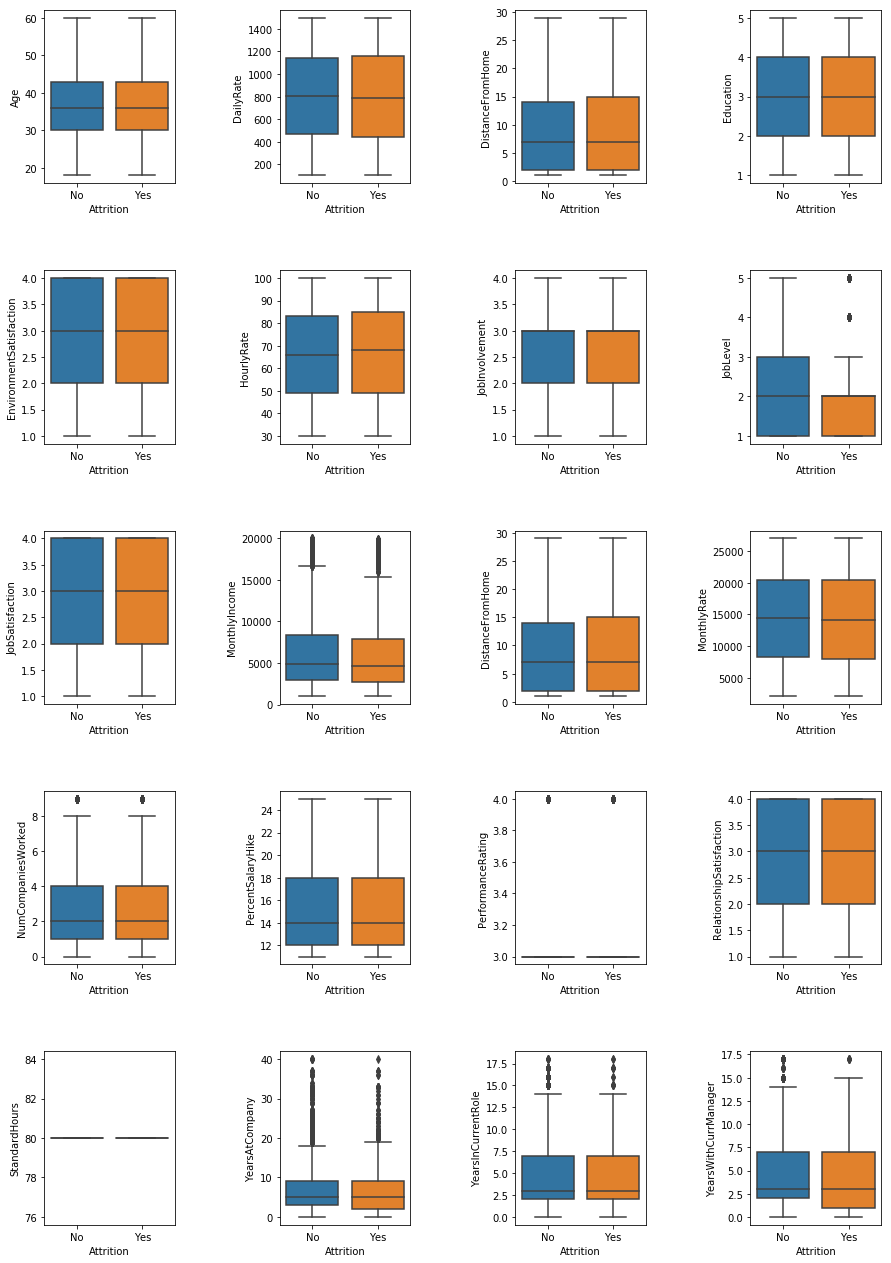

In [8]:


#Tamaño de las figuras
fig, axes= plt.subplots(nrows=5, ncols=4,figsize=(15,9))

#Distancia entre cada figura
plt.subplots_adjust(left=None, bottom=None, right=None, top=2, wspace=0.8, hspace=0.5)


# Primera fila de graficos


sns.boxplot(x="Attrition", y="Age",
            data=data,orient = 'v',ax=axes[0,0])

sns.boxplot(x="Attrition", y="DailyRate",
            data=data,orient = 'v',ax=axes[0,1])

sns.boxplot(x="Attrition", y="DistanceFromHome",
            data=data,orient = 'v',ax=axes[0,2])


sns.boxplot(x="Attrition", y="Education",
            data=data,orient = 'v',ax=axes[0,3])


# Segunda Fila de graficos


sns.boxplot(x="Attrition", y="EnvironmentSatisfaction",
            data=data,orient = 'v',ax=axes[1,0])

sns.boxplot(x="Attrition", y="HourlyRate",
            data=data,orient = 'v',ax=axes[1,1])

sns.boxplot(x="Attrition", y="JobInvolvement",
            data=data,orient = 'v',ax=axes[1,2])

sns.boxplot(x="Attrition", y="JobLevel",
            data=data,orient = 'v',ax=axes[1,3])


# Tercera Fila de graficos


sns.boxplot(x="Attrition", y="JobSatisfaction",
            data=data,orient = 'v',ax=axes[2,0])

sns.boxplot(x="Attrition", y="MonthlyIncome",
            data=data,orient = 'v',ax=axes[2,1])

sns.boxplot(x="Attrition", y="DistanceFromHome",
            data=data,orient = 'v',ax=axes[2,2])

sns.boxplot(x="Attrition", y="MonthlyRate",
            data=data,orient = 'v',ax=axes[2,3])


# Cuarta Fila de graficos


sns.boxplot(x="Attrition", y="NumCompaniesWorked",
            data=data,orient = 'v',ax=axes[3,0])

sns.boxplot(x="Attrition", y="PercentSalaryHike",
            data=data,orient = 'v',ax=axes[3,1])

sns.boxplot(x="Attrition", y="PerformanceRating",
            data=data,orient = 'v',ax=axes[3,2])

sns.boxplot(x="Attrition", y="RelationshipSatisfaction",
            data=data,orient = 'v',ax=axes[3,3])


# Quinta Fila de graficos


sns.boxplot(x="Attrition", y="StandardHours",
            data=data,orient = 'v',ax=axes[4,0])

sns.boxplot(x="Attrition", y="YearsAtCompany",
            data=data,orient = 'v',ax=axes[4,1])

sns.boxplot(x="Attrition", y="YearsInCurrentRole",
            data=data,orient = 'v',ax=axes[4,2])

sns.boxplot(x="Attrition", y="YearsWithCurrManager",
            data=data,orient = 'v',ax=axes[4,3])



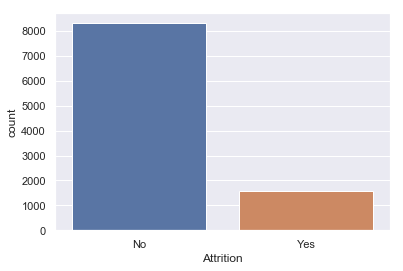

In [9]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Attrition", data=data)


### Conclusión: 

 - Outliers: Notamos que los campos JobLevel, MonthlyIncome, NumCompaniesWorked, YearsAtCompany, YearsCurrentRole and YearswithCurrentManager tienen outliers. Las mismas variables las analizaremos con outliers y sin en el momento de aplicar algoritmos de predicción.
 
 - Distribution Output: Como vemos tenemos 4 veces más datos que son No (casi 8000) vs casi 1500 que son Si

### e) Correlación

In [10]:
corr = data.corr()


In [2]:
g = sns.heatmap(corr,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(25,20)
    
plt.show()

NameError: name 'sns' is not defined

#### Conclusión:

Realizamos la correlación entre sus variables numéricas. No encontramos correlación entre sus variables.

#  2) Feature Engineering

**Variables Categóricas**: 
    - Lo primero que realizaremos es dividir en 4 listas las columnas del dataset. La división será de la siguiente manera. Las columnas numéricas, las columnas categóricas con solo dos opciones, las columnas categóricas con más de dos opciones y la columna  target

    - Lo primero que realizaremos es modificar las variables categóricas a variables numéricas. Para eso las columnas que tengan solo dos opciones, utilizaremos Label Encoding, modificando sus valores categóricos por 0 o 1. 
    
    - Por otro lado, aquellas variables categóricas que tengan más de dos opciones utilizaremos One Hot Label Encoding ya que luego puede perjudicar en el modelo predictivo si ponemos en una sola columna valores que van de 0 a x.

### 2.a) Dividir dataset según data type

In [12]:
## numerical_columns

numerical = []
for col, value in data.iteritems():
    if value.dtype == 'float64':
        numerical.append(col)
        
numerical_columns = data[numerical]


## categorical con solo 2 opciones o menos. Dropeamos Attrition

binary = []
for col, value in data.iteritems():
    if value.dtype != 'float64' and value.nunique() <= 2:
        binary.append(col)
        
binary_columns = data[binary]

binary_columns.drop('Attrition', axis=1, inplace=True)

### categorical con más de 3 opciones

categorical = []
for col, value in data.iteritems():
    if value.dtype != 'float64' and value.nunique() > 2:
        categorical.append(col)
        
categorical_columns = data[categorical]




C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 2.a) Label Encoding for Binary columns

Aquellas variables categoricas que tienen como resultado dos opciones utilizaremos label encoding

In [13]:
binary_encoding = binary_columns.apply(LabelEncoder().fit_transform)

### 2.b) One hot label encoding

In [14]:
categorical_encoding = pd.get_dummies(categorical_columns)


### 2.c) Output

In [15]:
# Defino un diccionario donde yes es 1 y no 0. Después aplico la formula a la columna attrition
target_map = {'Yes':1, 'No':0}
output_columns = pd.DataFrame(data['Attrition'].apply(lambda x: target_map[x]))

### 2.d) Concateno todas las columnas en un nuevo DataFrame

In [16]:
data_model = pd.concat([numerical_columns,binary_encoding,categorical_encoding,output_columns],axis=1)


### 2.e) Oversampling and undersampling

Como vimos anteriormente nuestra clase "Attrition" está desbalanceada por lo que aplicaremos la tecnica SmoteTomek. Smote es el metodo de oversampling en el cual genera nuevos ejemplos, por otro lado Tomek es una técnica de undersampling en el cual detecta los pares de diferentes clases más cercanos y elimina ambos o uno de ellos.
La librería imbalanced acepta dataframe para X y Series para y

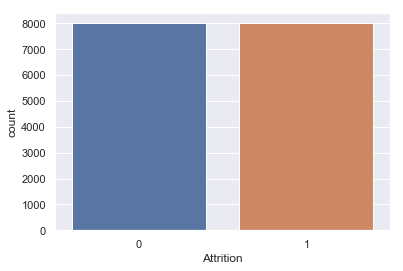

In [17]:


X = data_model.loc[:, data_model.columns != 'Attrition']
y = data_model.Attrition

smt = SMOTETomek(sampling_strategy='all',random_state=42)
X_smt, y_smt = smt.fit_sample(X, y)


data_overunder = pd.concat([X_smt,pd.DataFrame(y_smt)],axis=1)
data_overunder = data_overunder.rename(columns={0: "Attrition"})
data_overunder = data_overunder.dropna()
sns.set(style="darkgrid")
ax = sns.countplot(x="Attrition", data=data_overunder)
data_ML = data_overunder

### 2.f) Elimino outliers

In [45]:

data_ML_outliers = np.array(data_ML, dtype=np.float64)
data_ML_outliers = data_ML_outliers[(np.abs(stats.zscore(data_ML_outliers)) < 3).all(axis=1)]
data_ML_outliers


C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


array([], shape=(0, 54), dtype=float64)

# 3) Machine Learning

In [18]:
X = data_ML.loc[:, data_ML.columns != 'Attrition']
y = data_ML.Attrition


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
